<a href="https://colab.research.google.com/github/mdappaaa/MSIB-K2-KelasAwanPintar/blob/main/ML_2_Regresi_Lanjutan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-2 Regresi Lanjutan

Sebelum mulai:
*   Student yang pakai Colab, silahkan "Save a Copy in Drive" dahulu
*   Student yang pakai Jupyter Notebook, silahkan download code ini dahulu



# Import Library

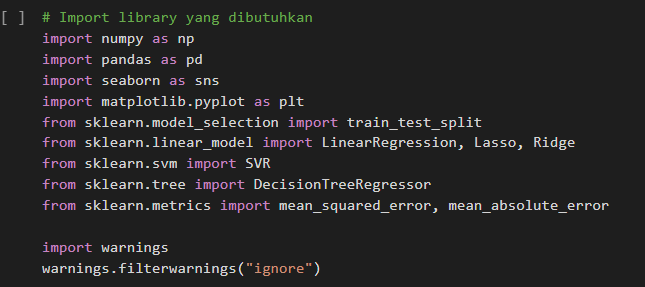

In [1]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")


# Load Dataset
https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv

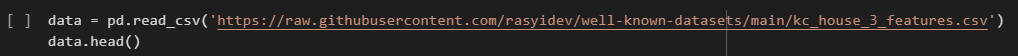

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv')
data.head()



,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0


Dataset memiliki 3 feature:
- sqft_living
- sqft_living15
- sqft_above

dan sebuah label, yakni price.

# 1. Analisis Korelasi

Lakukan analisis korelasi terhadap dataset.

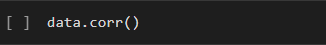

In [3]:
data.corr()


,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


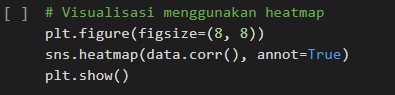

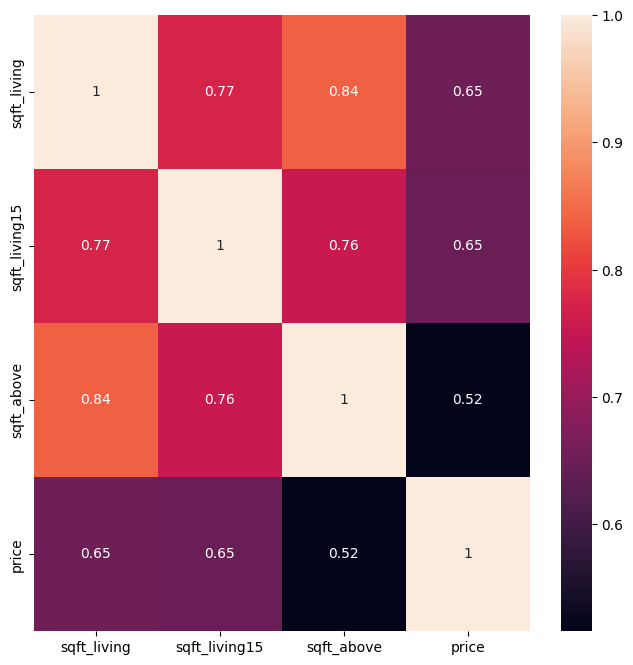

In [4]:
# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()



Hasil analisis korelasi menunjukkan bahwa:
- semua feature berkorelasi positif terhadap price
- feature sqft_living dan sqft_living15 memiliki koefisien korelasi tertinggi

# Split Dataset

Split dataset menjadi:
- training data (X_train dan y_train) 80%
- testing data (X_test dan y_test) 20%

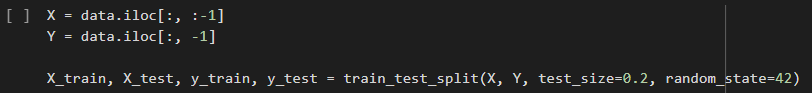

In [5]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

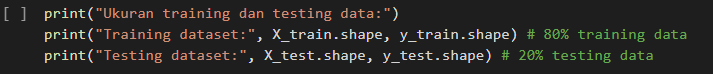

In [6]:
print("Ukuran training dan testing data:")
print("Training dataset:", X_train.shape, Y_train.shape)  # 80% training data
print("Testing dataset:", X_test.shape, Y_test.shape)   # 20% testing data


Ukuran training dan testing data:
Training dataset: (80, 3) (80,)
Testing dataset: (20, 3) (20,)


# 2. Modeling

Pada program ini, kita akan melatih lebih dari satu model regresi, antara lain:
- Regresi Linier
- Regresi Lasso
- Regresi Ridge
- Support Vector Regressor (SVR)
- Decision Tree Regressor (DTR)

Latih semua model menggunakan training data (X_train dan y_train)


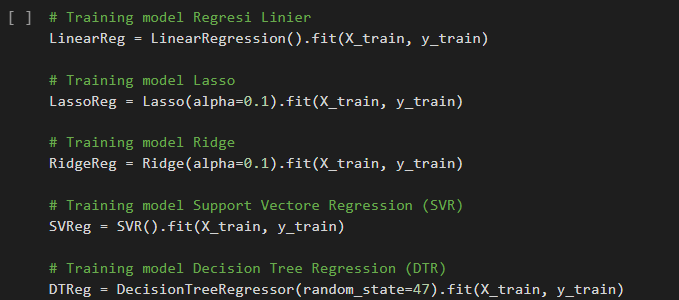

In [7]:
# Training model Regresi Linier
LinearReg = LinearRegression().fit(X_train, Y_train)

# Tarining model Lasso
LassoReg = Lasso(alpha=0.1).fit(X_train, Y_train)

# Training model Ridge
RidgeReg = Ridge(alpha=0.1).fit(X_train, Y_train)


# Training model Support Vectore Regression (SVR)
SVReg = SVR().fit(X_train, Y_train)

# Training model Decision Tree Regression (DTR)
DTReg = DecisionTreeRegressor(random_state=47).fit(X_train, Y_train)

**alpha=0.1** dan **random_state=47** disebut sebagai hyperparameter.

Umumnya, setiap algoritma AI memiliki hyperparameter yang bisa kita setel (tuning) sesuai keinginan.

Setelan hyperparameter yang tepat mampu meningkatkan performa model.

Kunjungi dokumentasi library untuk mempelajari tentang hyperparameter:
- [Regresi Linier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Regresi Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- [Regresi Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [DTR](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

# 3. Evaluasi Model Menggunakan Metric MSE dan R2

Lakukan evaluasi pada semua model yang telah dilatih. Sebelum itu, kita perlu men-generate hasil prediksi tiap model.

Generate:
- hasil prediksi training data (y pred train)
- hasil prediksi testing data (y pred test)

menggunakan model.

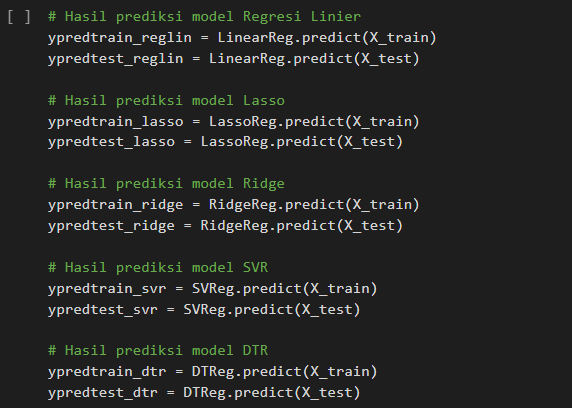

In [8]:
# Hasil prediksi model Regresi Linier
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

# Hasil prediksi model Lasso
ypredtrain_lasso = LassoReg.predict(X_train)
ypredtest_lasso = LassoReg.predict(X_test)

# Hasil prediksi model Ridge
ypredtrain_ridge = RidgeReg.predict(X_train)
ypredtest_ridge = RidgeReg.predict(X_test)

# Hasil prediksi model SVR
ypredtrain_svr = SVReg.predict(X_train)
ypredtest_svr = SVReg.predict(X_test)

# Hasil prediksi model  DTR
ypredtrain_dtr = DTReg.predict(X_train)
ypredtest_dtr = DTReg.predict(X_test)

Evaluasi pertama dilakukan menggunakan metric MSE.

Bandingkan:
- label training data (y_train) dengan hasil prediksi training data (y pred train)
- label testing data (y_test) dengan hasil prediksi testing data (y pred test)

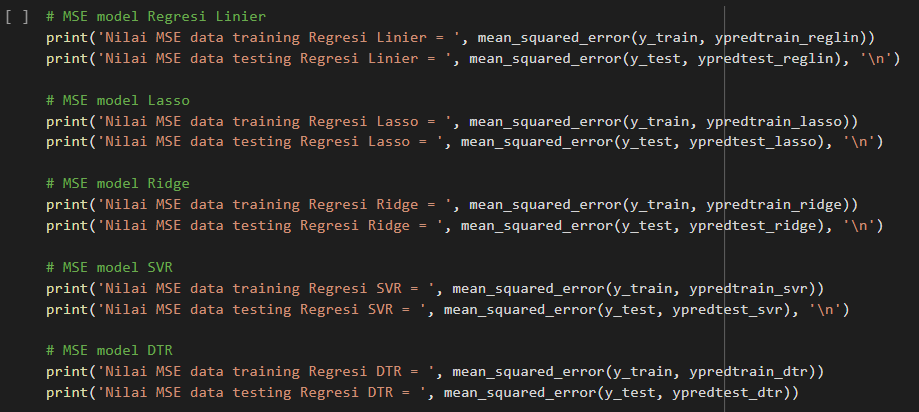

In [9]:
# MSE model Regresi Linier
print('Nilai MSE data training Regresi Linier =', mean_squared_error(Y_train, ypredtrain_reglin))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(Y_test, ypredtest_reglin), '\n')

# MSE model Lasso
print('Nilai MSE data training Regresi Lasso =', mean_squared_error(Y_train, ypredtrain_lasso))
print('Nilai MSE data testing Regresi Lasso =', mean_squared_error(Y_test, ypredtest_lasso), '\n')

# MSE model Ridge
print('Nilai MSE data training Regresi Ridge =', mean_squared_error(Y_train, ypredtrain_ridge))
print('Nilai MSE data testing Regresi Ridge =', mean_squared_error(Y_test, ypredtest_ridge), '\n')

# MSE model SVR
print('Nilai MSE data training Regresi SVR =', mean_squared_error(Y_train, ypredtrain_svr))
print('Nilai MSE data testing Regresi SVR =', mean_squared_error(Y_test, ypredtest_svr), '\n')

# MSE model Regresi DTR
print('Nilai MSE data training Regresi DTR =', mean_squared_error(Y_train, ypredtrain_dtr))
print('Nilai MSE data testing Regresi DTR =', mean_squared_error(Y_test, ypredtest_dtr))

Nilai MSE data training Regresi Linier = 51040616225.03679
Nilai MSE data testing Regresi Linier =  32881775262.15838 

Nilai MSE data training Regresi Lasso = 51040616225.03679
Nilai MSE data testing Regresi Lasso = 32881775271.07427 

Nilai MSE data training Regresi Ridge = 51040616225.0368
Nilai MSE data testing Regresi Ridge = 32881775254.902454 

Nilai MSE data training Regresi SVR = 113673471256.08711
Nilai MSE data testing Regresi SVR = 37393496977.231895 

Nilai MSE data training Regresi DTR = 455625000.0
Nilai MSE data testing Regresi DTR = 40958648000.0


Hasil evaluasi MSE menunjukkan bahwa:


Model | MSE traing data | MSE testing data | Keputusan
---|---|---|---|
Regresi Linier | 51040616225.03679 | 32881775262.15838 | -
Regresi Lasso | 51040616225.0368 | 32881775271.07428 | -
Regresi Ridge | 32881775271.07428 | 32881775254.902466 | -
SVR | 113673471256.08711 | 37393496977.231895 | Overfit
DTR | 455625000.0 | 40958648000.0 | Goodfit

Model DTR merupakan model terbaik karena MSE training dan testing tidak jauh berbeda.

> **Note**: Regresi Linier, Lasso, dan Ridge memiliki MSE training yang lebih tinggi dibanding MSE testing. Hal ini bisa terjadi karena data kita berjumlah sedikit. Salah satu solusinya adalah dengan menambah jumlah data dalam dataset.

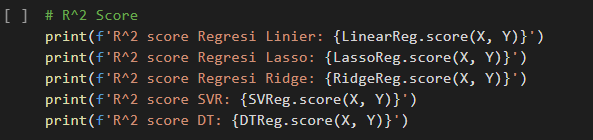

In [10]:
# R^2 Score
print(f'R^2 score Regresi Linier: {LinearReg.score(X, Y)}')
print(f'R^2 score Regresi Lasso: {LassoReg.score(X, Y)}')
print(f'R^2 score Regresi Ridge: {RidgeReg.score(X, Y)}')
print(f'R^2 score Regresi SVR: {SVReg.score(X, Y)}')
print(f'R^2 score Regresi DTR: {DTReg.score(X, Y)}')

R^2 score Regresi Linier: 0.48353037146199596
R^2 score Regresi Lasso: 0.48353037144257016
R^2 score Regresi Ridge: 0.4835303714778053
R^2 score Regresi SVR: -0.07215508470730314
R^2 score Regresi DTR: 0.906788861012355


Pilih model dengan R^2 score mendekati 1.

Hasil evaluasi R^2 score menunjukkan bahwa DTR merupakan model terbaik.

## Visualisasi Hasil Prediksi dengan Data Sebenarnya

Visualisasikan perbandingan antara label testing data (y_test) dengan hasil prediksi testing data (y pred test) pada setiap model.

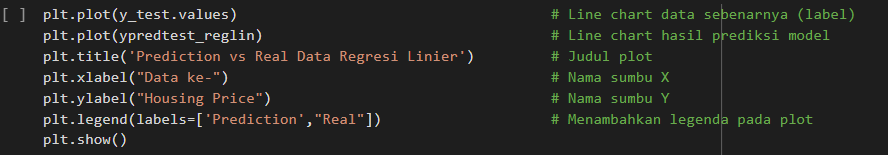

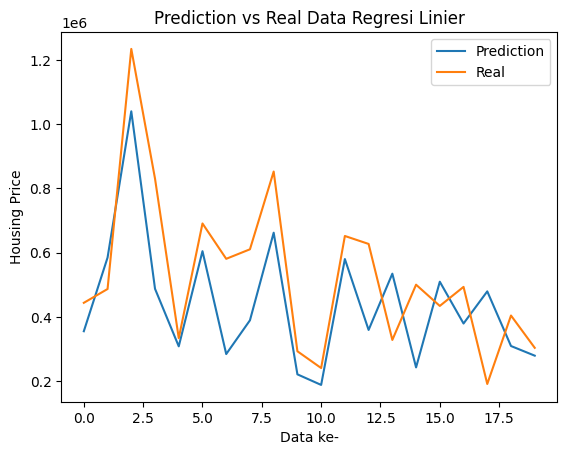

In [11]:
plt.plot(Y_test.values)                                           # Line chart data sebenarnya (label)
plt.plot(ypredtest_reglin)                                        # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Linier')               # Judul plot
plt.xlabel("Data ke-")                                            # Nama sumbu X
plt.ylabel("Housing Price")                                       # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])                         # Menambahkan legenda pada plot
plt.show()

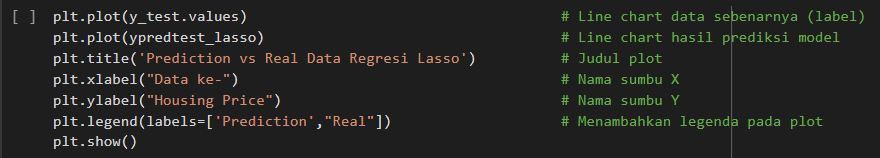

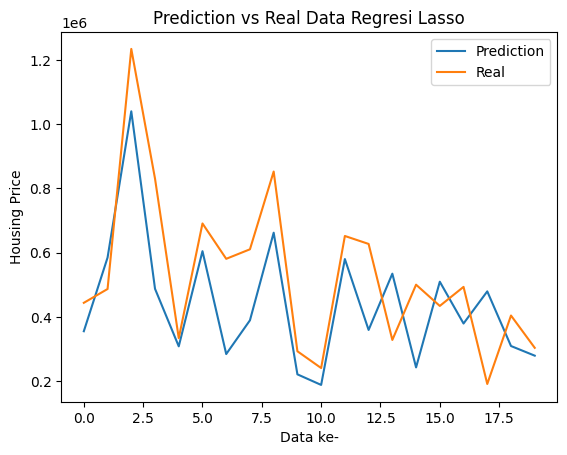

In [12]:
plt.plot(Y_test.values)                                           # Line chart data sebenarnya (label)
plt.plot(ypredtest_lasso)                                         # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Lasso')               # Judul plot
plt.xlabel("Data ke-")                                            # Nama sumbu X
plt.ylabel("Housing Price")                                       # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])                         # Menambahkan legenda pada plot
plt.show()


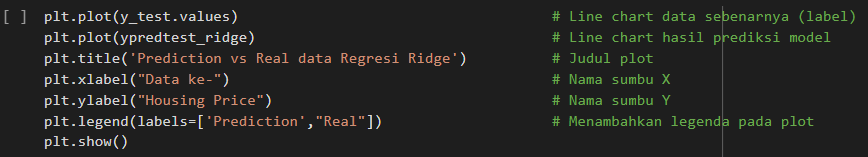

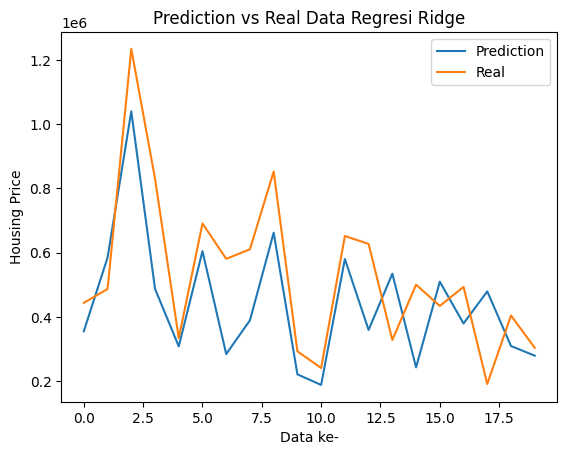

In [13]:
plt.plot(Y_test.values)                                           # Line chart data sebenarnya (label)
plt.plot(ypredtest_ridge)                                         # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Ridge')               # Judul plot
plt.xlabel("Data ke-")                                            # Nama sumbu X
plt.ylabel("Housing Price")                                       # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])                         # Menambahkan legenda pada plot
plt.show()


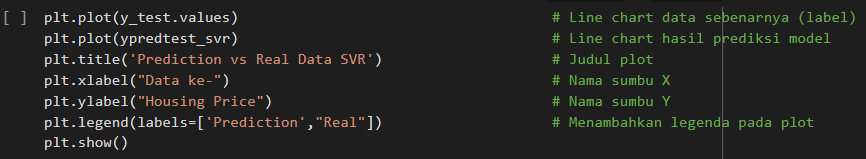

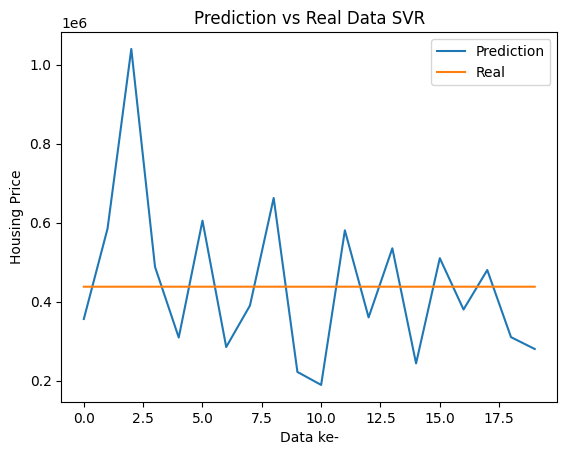

In [14]:
plt.plot(Y_test.values)                                           # Line chart data sebenarnya (label)
plt.plot(ypredtest_svr)                                           # Line chart hasil prediksi model
plt.title('Prediction vs Real Data SVR')               # Judul plot
plt.xlabel("Data ke-")                                            # Nama sumbu X
plt.ylabel("Housing Price")                                       # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])                         # Menambahkan legenda pada plot
plt.show()


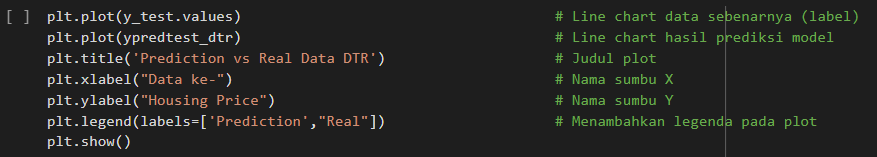

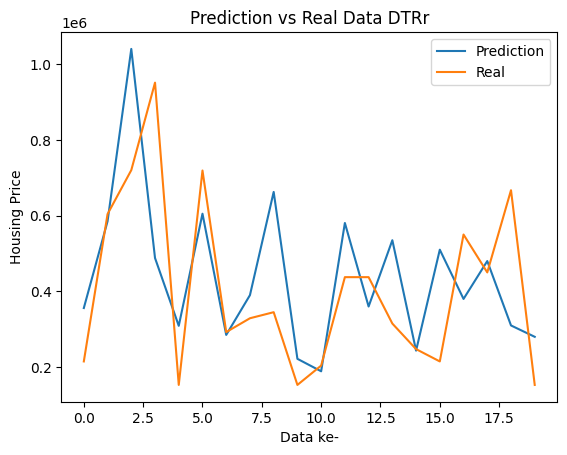

In [15]:
plt.plot(Y_test.values)                                           # Line chart data sebenarnya (label)
plt.plot(ypredtest_dtr)                                           # Line chart hasil prediksi model
plt.title('Prediction vs Real Data DTRr')               # Judul plot
plt.xlabel("Data ke-")                                            # Nama sumbu X
plt.ylabel("Housing Price")                                       # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])                         # Menambahkan legenda pada plot
plt.show()


# Kesimpulan

Model DTR merupakan model terbaik berdasarkan hasil evaluasi menggunakan metrics MSE dan R^2.

Model DTR selanjutnya kita pilih untuk memprediksi data baru.

Model DTR juga sudah bisa kita deploy. Materi deployment akan disampaikan saat AI Domain.

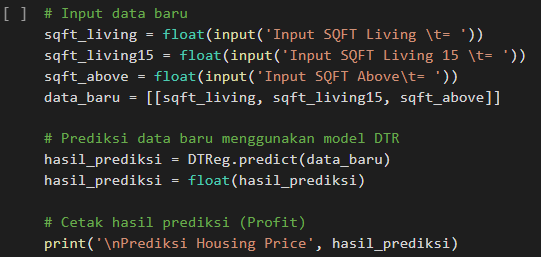

In [16]:
# Input data baru
sqft_living = float(input("Input SQFT Living \t="))
sqft_living15 = float(input("Input SQFT Living 15 \t="))
sqft_above = float(input("Input SQFT Above\t="))
data_baru = [[sqft_living, sqft_living15, sqft_above]]

# Prediksi data bar menggunakan model DTR
hasil_prediksi = DTReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

# Cetak hasil prediksi (Profit)
print("\nHasil Prediksi Housing Price ", hasil_prediksi)


Input SQFT Living 	=2.44
Input SQFT Living 15 	=2.56
Input SQFT Above	=2.77

Hasil Prediksi Housing Price  450000.0


# Exercise (Latihan)

1. Download dataset [di sini](https://drive.google.com/file/d/1ir-ilrC_m4XAny9tklloJc52oLITjUGy/view?usp=sharing).

2. Buat model regresi linier dan model regresi lainnya menggunakan dataset tersebut!
3. Evaluasi setiap model!
4. Tentukan dan jelaskan model yang paling baik!

In [17]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [18]:
data = pd.read_csv('/content/housing_price.csv')
data.head()

,total_rooms,housing_median_age,population,median_house_value
0,880.0,41.0,322.0,452600.0
1,7099.0,21.0,2401.0,358500.0
2,1467.0,52.0,496.0,352100.0
3,1274.0,52.0,558.0,341300.0
4,1627.0,52.0,565.0,342200.0


In [19]:
data.corr()

,total_rooms,housing_median_age,population,median_house_value
total_rooms,1.000000,-0.033254,0.920196,0.253887
housing_median_age,-0.033254,1.000000,-0.062477,0.018831
population,0.920196,-0.062477,1.000000,0.129279
median_house_value,0.253887,0.018831,0.129279,1.000000


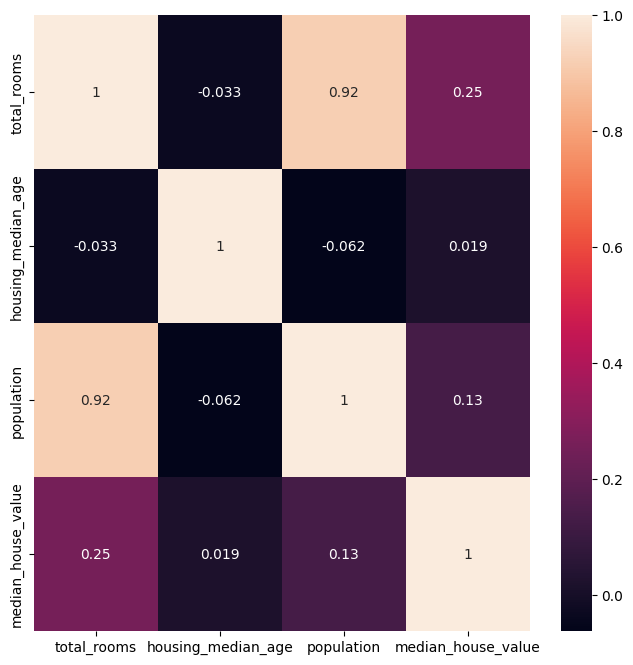

In [20]:
# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [21]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 45)

In [22]:
print("Ukuran training dan testing data:")
print("Training dataset:", X_train.shape, Y_train.shape)  # 80% training data
print("Testing dataset:", X_test.shape, Y_test.shape)   # 20% testing data

Ukuran training dan testing data:
Training dataset: (80, 3) (80,)
Testing dataset: (20, 3) (20,)


In [23]:
# Training model Regresi Linier
LinearReg = LinearRegression().fit(X_train, Y_train)

# Tarining model Lasso
LassoReg = Lasso(alpha=0.1).fit(X_train, Y_train)

# Training model Ridge
RidgeReg = Ridge(alpha=0.1).fit(X_train, Y_train)


# Training model Support Vectore Regression (SVR)
SVReg = SVR().fit(X_train, Y_train)

# Training model Decision Tree Regression (DTR)
DTReg = DecisionTreeRegressor(random_state=47).fit(X_train, Y_train)

In [24]:
# Hasil prediksi model Regresi Linier
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

# Hasil prediksi model Lasso
ypredtrain_lasso = LassoReg.predict(X_train)
ypredtest_lasso = LassoReg.predict(X_test)

# Hasil prediksi model Ridge
ypredtrain_ridge = RidgeReg.predict(X_train)
ypredtest_ridge = RidgeReg.predict(X_test)

# Hasil prediksi model SVR
ypredtrain_svr = SVReg.predict(X_train)
ypredtest_svr = SVReg.predict(X_test)

# Hasil prediksi model  DTR
ypredtrain_dtr = DTReg.predict(X_train)
ypredtest_dtr = DTReg.predict(X_test)

In [25]:
# MSE model Regresi Linier
print('Nilai MSE data training Regresi Linier =', mean_squared_error(Y_train, ypredtrain_reglin))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(Y_test, ypredtest_reglin), '\n')

# MSE model Lasso
print('Nilai MSE data training Regresi Lasso =', mean_squared_error(Y_train, ypredtrain_lasso))
print('Nilai MSE data testing Regresi Lasso =', mean_squared_error(Y_test, ypredtest_lasso), '\n')

# MSE model Ridge
print('Nilai MSE data training Regresi Ridge =', mean_squared_error(Y_train, ypredtrain_ridge))
print('Nilai MSE data testing Regresi Ridge =', mean_squared_error(Y_test, ypredtest_ridge), '\n')

# MSE model SVR
print('Nilai MSE data training Regresi SVR =', mean_squared_error(Y_train, ypredtrain_svr))
print('Nilai MSE data testing Regresi SVR =', mean_squared_error(Y_test, ypredtest_svr), '\n')

# MSE model Regresi DTR
print('Nilai MSE data training Regresi DTR =', mean_squared_error(Y_train, ypredtrain_dtr))
print('Nilai MSE data testing Regresi DTR =', mean_squared_error(Y_test, ypredtest_dtr))

Nilai MSE data training Regresi Linier = 4304976063.139377
Nilai MSE data testing Regresi Linier =  11348923396.55395 

Nilai MSE data training Regresi Lasso = 4304976063.139444
Nilai MSE data testing Regresi Lasso = 11348923251.555513 

Nilai MSE data training Regresi Ridge = 4304976063.139382
Nilai MSE data testing Regresi Ridge = 11348923367.740057 

Nilai MSE data training Regresi SVR = 4607816167.111286
Nilai MSE data testing Regresi SVR = 15059629089.196484 

Nilai MSE data training Regresi DTR = 0.0
Nilai MSE data testing Regresi DTR = 10378389000.0


In [26]:
# R^2 Score
print(f'R^2 score Regresi Linier: {LinearReg.score(X, Y)}')
print(f'R^2 score Regresi Lasso: {LassoReg.score(X, Y)}')
print(f'R^2 score Regresi Ridge: {RidgeReg.score(X, Y)}')
print(f'R^2 score Regresi SVR: {SVReg.score(X, Y)}')
print(f'R^2 score Regresi DTR: {DTReg.score(X, Y)}')

R^2 score Regresi Linier: 0.0922222953707098
R^2 score Regresi Lasso: 0.09222229997804288
R^2 score Regresi Ridge: 0.09222229628627387
R^2 score Regresi SVR: -0.06417690759672823
R^2 score Regresi DTR: 0.6702255248313316


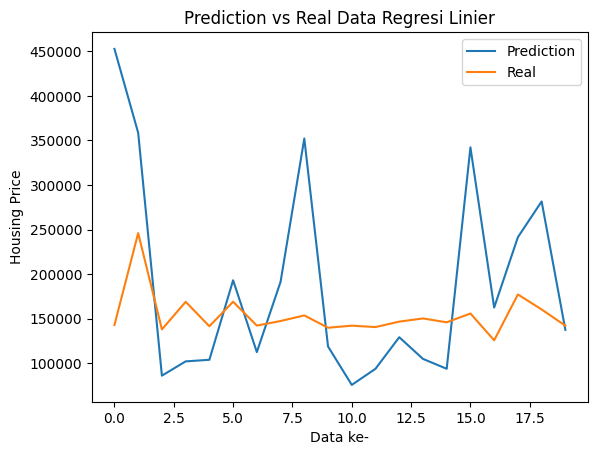

In [27]:
plt.plot(Y_test.values)                                           # Line chart data sebenarnya (label)
plt.plot(ypredtest_reglin)                                        # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Linier')               # Judul plot
plt.xlabel("Data ke-")                                            # Nama sumbu X
plt.ylabel("Housing Price")                                       # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])                         # Menambahkan legenda pada plot
plt.show()

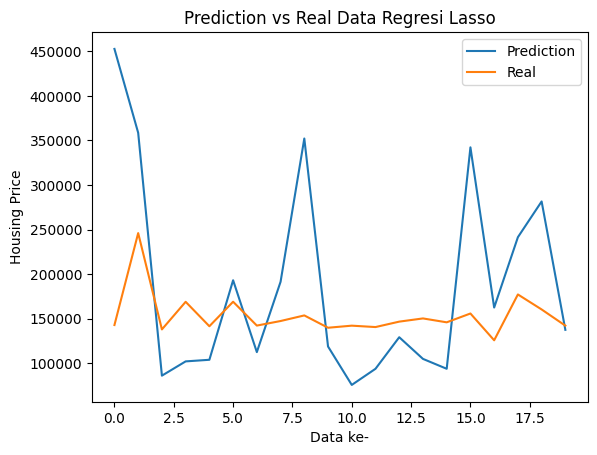

In [28]:
plt.plot(Y_test.values)                                           # Line chart data sebenarnya (label)
plt.plot(ypredtest_lasso)                                         # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Lasso')               # Judul plot
plt.xlabel("Data ke-")                                            # Nama sumbu X
plt.ylabel("Housing Price")                                       # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])                         # Menambahkan legenda pada plot
plt.show()

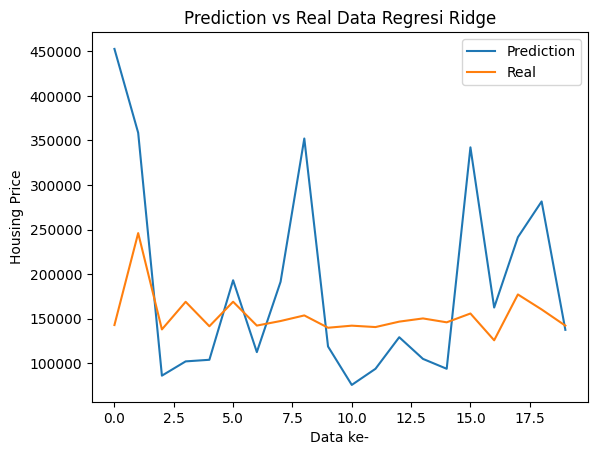

In [29]:
plt.plot(Y_test.values)                                           # Line chart data sebenarnya (label)
plt.plot(ypredtest_ridge)                                         # Line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Ridge')               # Judul plot
plt.xlabel("Data ke-")                                            # Nama sumbu X
plt.ylabel("Housing Price")                                       # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])                         # Menambahkan legenda pada plot
plt.show()

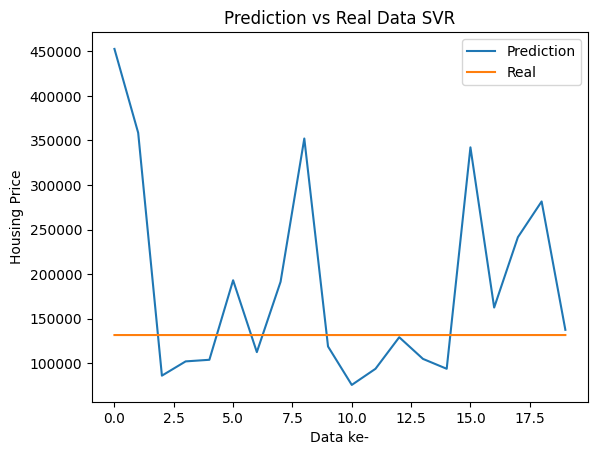

In [30]:
plt.plot(Y_test.values)                                           # Line chart data sebenarnya (label)
plt.plot(ypredtest_svr)                                           # Line chart hasil prediksi model
plt.title('Prediction vs Real Data SVR')               # Judul plot
plt.xlabel("Data ke-")                                            # Nama sumbu X
plt.ylabel("Housing Price")                                       # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])                         # Menambahkan legenda pada plot
plt.show()

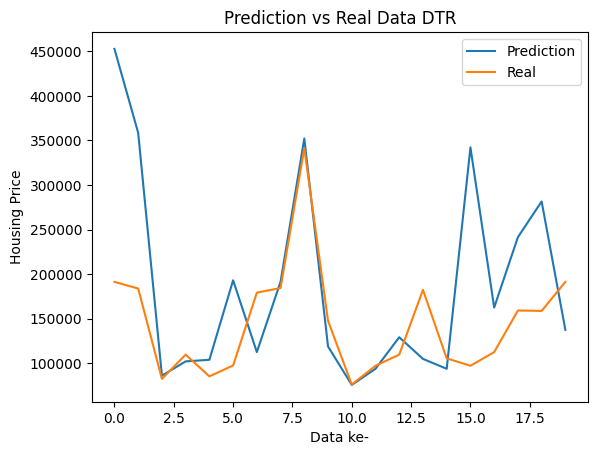

In [31]:
plt.plot(Y_test.values)                                           # Line chart data sebenarnya (label)
plt.plot(ypredtest_dtr)                                           # Line chart hasil prediksi model
plt.title('Prediction vs Real Data DTR')                          # Judul plot
plt.xlabel("Data ke-")                                            # Nama sumbu X
plt.ylabel("Housing Price")                                       # Nama sumbu Y
plt.legend(labels=['Prediction', "Real"])                         # Menambahkan legenda pada plot
plt.show()

In [32]:
# Model DTR merupakan model terbaik berdasarkan hasil evaluasi menggunakan metrics MSE dan R^2.
# Model DTR selanjutnya kita pilih untuk memprediksi data baru.

# Input data baru
sqft_total_rooms = float(input("Input SQFT total_rooms \t="))
sqft_Housing_median_age = float(input("Input SQFT Housing_median_age\t="))
sqft_population = float(input("Input SQFT Population\t="))
data_baru = [[sqft_total_rooms, sqft_Housing_median_age, sqft_population]]

# Prediksi data bar menggunakan model DTR
hasil_prediksi = DTReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

# Cetak hasil prediksi (Profit)
print("\nHasil median_house_value ", hasil_prediksi)



Input SQFT total_rooms 	=0.11
Input SQFT Housing_median_age	=2
Input SQFT Population	=3

Hasil median_house_value  60000.0
